In [69]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import kstest, anderson, shapiro
import numpy as np

In [2]:
data = pd.read_csv("train.csv")
data = pd.DataFrame(data)

In [4]:
size = data.shape[0]
train_size = round(size*0.8)
test_size = size - train_size
print(size, train_size, test_size)

891 713 178


In [5]:
#разделение без перемешивания
train_data = data[0:train_size]
test_data = data[train_size:]
print(train_data.shape, test_data.shape)

(713, 12) (178, 12)


In [6]:
train_data.to_csv("train_data_new", index = False);
test_data.to_csv("test_data_new", index = False);

In [12]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,713.000000,713.000000,713.000000,566.000000,713.000000,713.000000,713.000000
mean,357.000000,0.391304,2.300140,30.062279,0.528752,0.381487,32.536874
std,205.969658,0.488385,0.839484,14.609245,1.063741,0.812677,48.643995
min,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,179.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,357.000000,0.000000,3.000000,28.000000,0.000000,0.000000,15.045800
75%,535.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,713.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
test_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,178.000000,178.000000,178.000000,148.000000,178.000000,178.000000,178.000000
mean,802.500000,0.353933,2.342697,28.310270,0.500000,0.382022,30.871675
std,51.528309,0.479537,0.823715,14.168218,1.249859,0.781215,53.817131
min,714.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,758.250000,0.000000,2.000000,19.000000,0.000000,0.000000,7.895800
50%,802.500000,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,846.750000,1.000000,3.000000,35.250000,1.000000,0.000000,30.000000
max,891.000000,1.000000,3.000000,74.000000,8.000000,5.000000,512.329200


In [16]:
(train_data['Age'].mean()) >= (test_data['Age'].mean())

True

In [17]:
(train_data['Fare'].mean()) >= (test_data['Fare'].mean())

True

In [18]:
(train_data['Fare'].mode())

0    8.05
dtype: float64

In [19]:
(test_data['Fare'].mode())

0    13.0
dtype: float64

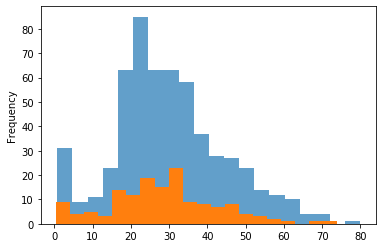

In [33]:
#Гистограммы:
train_data['Age'].plot.hist(bins = 20, alpha = 0.7);
test_data['Age'].plot.hist(bins = 20);

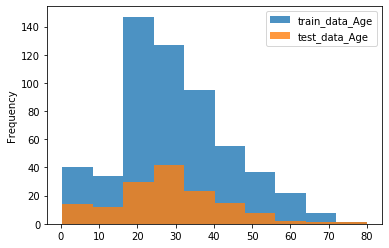

In [36]:
plt_Age = pd.DataFrame({'train_data_Age': train_data['Age'], 'test_data_Age':test_data['Age']}, 
                   columns = ['train_data_Age', 'test_data_Age'])
plt_Age.plot.hist(alpha = 0.8);

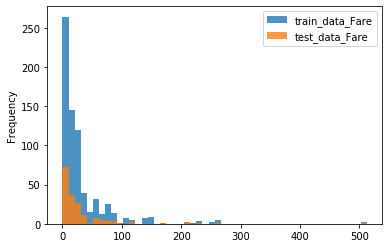

In [38]:
plt_Fare = pd.DataFrame({'train_data_Fare': train_data['Fare'], 'test_data_Fare':test_data['Fare']}, 
                   columns = ['train_data_Fare', 'test_data_Fare'])
plt_Fare.plot.hist(bins = 50, alpha = 0.8);

In [54]:
#проверка на нормальность по столбцу Fare:
kstest(train_data['Fare'], 'norm')

KstestResult(statistic=0.9845421904745125, pvalue=0.0)

In [83]:
kstest(test_data['Fare'], 'norm')

KstestResult(statistic=0.9864861998349146, pvalue=4.530007161562e-277)

In [60]:
shapiro(train_data['Fare'])

(0.5403509736061096, 1.834728487131269e-39)

In [64]:
shapiro(test_data['Fare'])

(0.459755003452301, 5.180093630545949e-23)

In [84]:
anderson(train_data['Fare'], dist='norm')

AndersonResult(statistic=71.58395551810554, critical_values=array([0.572, 0.651, 0.782, 0.912, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [66]:
#проверка на нормальность не может осуществляться если в data есть NaN
train_data['Age'].isna().sum()

147

In [76]:
#копируем DataFrame и удаляем строки с NaN
train_data_kn = train_data
train_data_kn.dropna(subset=['Age'], inplace = True)
test_data_kn = test_data
test_data_kn.dropna(subset=['Age'], inplace = True)

C:\Users\PC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\PC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [74]:
#проверка - NaN нет
train_data_kn['Age'].isna().sum()

0

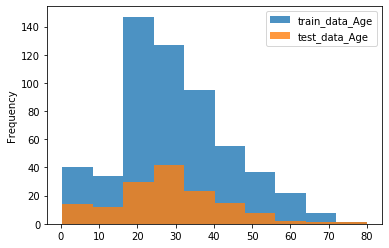

In [77]:
#гистограммы на новом dataFrame
plt_Age = pd.DataFrame({'train_data_Age': train_data_kn['Age'], 'test_data_Age':test_data_kn['Age']}, 
                   columns = ['train_data_Age', 'test_data_Age'])
plt_Age.plot.hist(alpha = 0.8);

In [78]:
#проверка на нрмальность солбца Age:
shapiro(train_data_kn['Age'])

(0.9799358248710632, 5.147859383214382e-07)

In [79]:
shapiro(test_data_kn['Age'])

(0.981924831867218, 0.048641856759786606)

In [80]:
kstest(train_data_kn['Age'], 'norm')

KstestResult(statistic=0.9668479818270271, pvalue=0.0)

In [81]:
kstest(test_data_kn['Age'], 'norm')

KstestResult(statistic=0.9594277882176263, pvalue=2.0838919633857446e-206)